In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib notebook

In [7]:
!pwd

/Users/thoashook/flatiron/DS-Project_01/DS-Project_01


In [8]:
df = pd.read_csv('diabetic_readmission_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [10]:
print(df.shape)

(101766, 50)


In [11]:
# we want to see statistical on non-numerical features (count, unique, top, and frequency)
df.describe(include = ['object', 'bool']) 

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,4,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,None,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,96420,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [12]:
# checking for missing values if any
df.isna().any().sum()

0

In [60]:
#checking for duplicates
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,new_readmitted


In [13]:
#loop though the columns to check for unique values (?) in each column 
for col in df.columns:    
    print(col, df[col].value_counts())

encounter_id 96210942     1
89943846     1
384306986    1
94650156     1
83156784     1
2674482      1
281345844    1
193616274    1
355508024    1
165973818    1
125278944    1
420873188    1
157241154    1
161161032    1
174855390    1
134950734    1
154128210    1
96993108     1
122064144    1
297770840    1
382612616    1
165134172    1
108244830    1
210578766    1
443842340    1
151469730    1
289146210    1
154590960    1
145948404    1
176328594    1
            ..
249722520    1
111830682    1
126506652    1
80193186     1
186881700    1
147162726    1
263120844    1
249665124    1
151295556    1
113303472    1
73909806     1
422050106    1
13655088     1
168523320    1
296140568    1
98784828     1
157333056    1
280536642    1
130655706    1
190162530    1
107017800    1
103828530    1
176744010    1
172279374    1
297285200    1
74454612     1
208073976    1
166229592    1
38340702     1
77856768     1
Name: encounter_id, Length: 101766, dtype: int64
patient_nbr 88785891   

rosiglitazone No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64
acarbose No        101458
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64
miglitol No        101728
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64
troglitazone No        101763
Steady         3
Name: troglitazone, dtype: int64
tolazamide No        101727
Steady        38
Up             1
Name: tolazamide, dtype: int64
examide No    101766
Name: examide, dtype: int64
citoglipton No    101766
Name: citoglipton, dtype: int64
insulin No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64
glyburide-metformin No        101060
Steady       692
Up             8
Down           6
Name: glyburide-metformin, dtype: int64
glipizide-metformin No        101753
Steady        13
Name: glipizide-metformin, dtype: int64
glimepiride-pioglitazone No        101765
Steady         1
Name: glimepirid

In [14]:
df['gender'].replace(to_replace = ['Unknown/Invalid'],
          value = 'Male', inplace = True)

In [15]:
df['race'].value_counts()
# 2273 instances belong to an unidentified race
# 2273/101766 = 0.0223 ~ 2% >>>> delete ? values in race

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [16]:
df.replace(to_replace = ['?'],
          value = 'Caucasian', inplace = True)
# replace ? with Caucasian

In [17]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [18]:
df['gender'].value_counts()

Female    54708
Male      47058
Name: gender, dtype: int64

In [19]:
df['weight'].value_counts() 
# 98569 instances are missing from unidentified weight range. We will certainly drop this column

Caucasian    98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [14]:
df['medical_specialty'].value_counts()
# 49949 values are from ? category
# 49949/101766 = 0.49 ~ 49% >>>> we dont need this feature

Caucasian                            49949
InternalMedicine                     14635
Emergency/Trauma                      7565
Family/GeneralPractice                7440
Cardiology                            5352
Surgery-General                       3099
Nephrology                            1613
Orthopedics                           1400
Orthopedics-Reconstructive            1233
Radiologist                           1140
Pulmonology                            871
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                671
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Pediatrics                             254
Hematology/Oncology                    207
Neurology                              203
Pediatrics-

In [20]:
df['citoglipton'].value_counts()
# This column is empty. Will delete it

No    101766
Name: citoglipton, dtype: int64

In [21]:
df['payer_code'].value_counts()
# 40256/101766 = .396 ~ 40% of values in this column belong to ? category
# drop it!

Caucasian    40256
MC           32439
HM            6274
SP            5007
BC            4655
MD            3532
CP            2533
UN            2448
CM            1937
OG            1033
PO             592
DM             549
CH             146
WC             135
OT              95
MP              79
SI              55
FR               1
Name: payer_code, dtype: int64

In [22]:
df['examide'].value_counts()
# this column is empty >>> delete it

No    101766
Name: examide, dtype: int64

In [18]:
df.drop(['weight', 'payer_code', 'patient_nbr', 'medical_specialty', 'examide','citoglipton'],
        axis = 1, inplace = True)
df.head()


,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,149190,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [23]:
df['readmitted'].value_counts() 
# according to our data resource, readmission attributes are classified into 2 groups
# if no and >30 days are considered 'not being readmitted'
# and <30 days considered being readmitted
                                

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [24]:
percent_of_readmitted = 11357/(54864 + 35545 + 11357) *100
percent_of_readmitted          
# only 12.56% were readmitted!!!

11.159915885462727

In [25]:
df['readmitted'].replace(to_replace = ['NO'],
          value = '0', inplace = True)

In [26]:
df['readmitted'].replace(to_replace = ['>30'],
          value = '0', inplace = True)

In [27]:
df['readmitted'].replace(to_replace = ['<30'],
          value = '1', inplace = True)

In [28]:
df.head()
# we have applied feature engineering technique, and thus modified our data according to what we need

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),Caucasian,6,25,1,1,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),Caucasian,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),Caucasian,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),Caucasian,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),Caucasian,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [47]:
average_time_in_hospital = df['time_in_hospital'].mean()
average_time_in_hospital
# we would like to see if a person is hospital readmitted
# how long he/she will stay

4.395986871843248

In [48]:
df['average_time_in_hospital'] = average_time_in_hospital
df.head()
# we have created new column 'average_time_in_hospital'

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,average_time_in_hospital
0,2278392,8222157,Caucasian,Female,[0-10),Caucasian,6,25,1,1,...,No,No,No,No,No,No,No,No,0,4.395987
1,149190,55629189,Caucasian,Female,[10-20),Caucasian,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,0,4.395987
2,64410,86047875,AfricanAmerican,Female,[20-30),Caucasian,1,1,7,2,...,No,No,No,No,No,No,No,Yes,0,4.395987
3,500364,82442376,Caucasian,Male,[30-40),Caucasian,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,0,4.395987
4,16680,42519267,Caucasian,Male,[40-50),Caucasian,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,0,4.395987


In [35]:
df.readmitted = df.readmitted.astype(int)
df.groupby('race').agg({'readmitted': 'mean'})
# convert data type from object to integer
# finding the relationship between ethnicity and readmitted rate

,readmitted
race,
AfricanAmerican,0.112181
Asian,0.101404
Caucasian,0.112030
Hispanic,0.104075
Other,0.096282


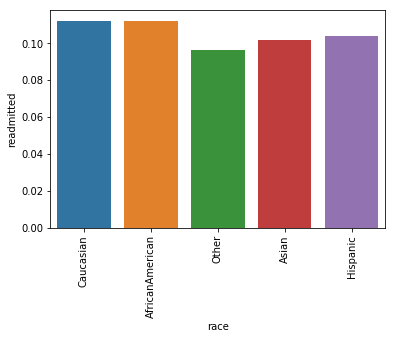

In [27]:
ax = sns.barplot(x='race', y = 'readmitted', data = df, estimator = np.mean, ci = None)
ax.tick_params(axis ='x', rotation = 90);
# No differences between ethnicities and readmission rate

In [32]:
df['diabetesMed'].value_counts()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

In [44]:
df.groupby('diabetesMed').agg({'readmitted': 'mean'}).head()


,readmitted
diabetesMed,
No,0.095971
Yes,0.116267


<IPython.core.display.Javascript object>


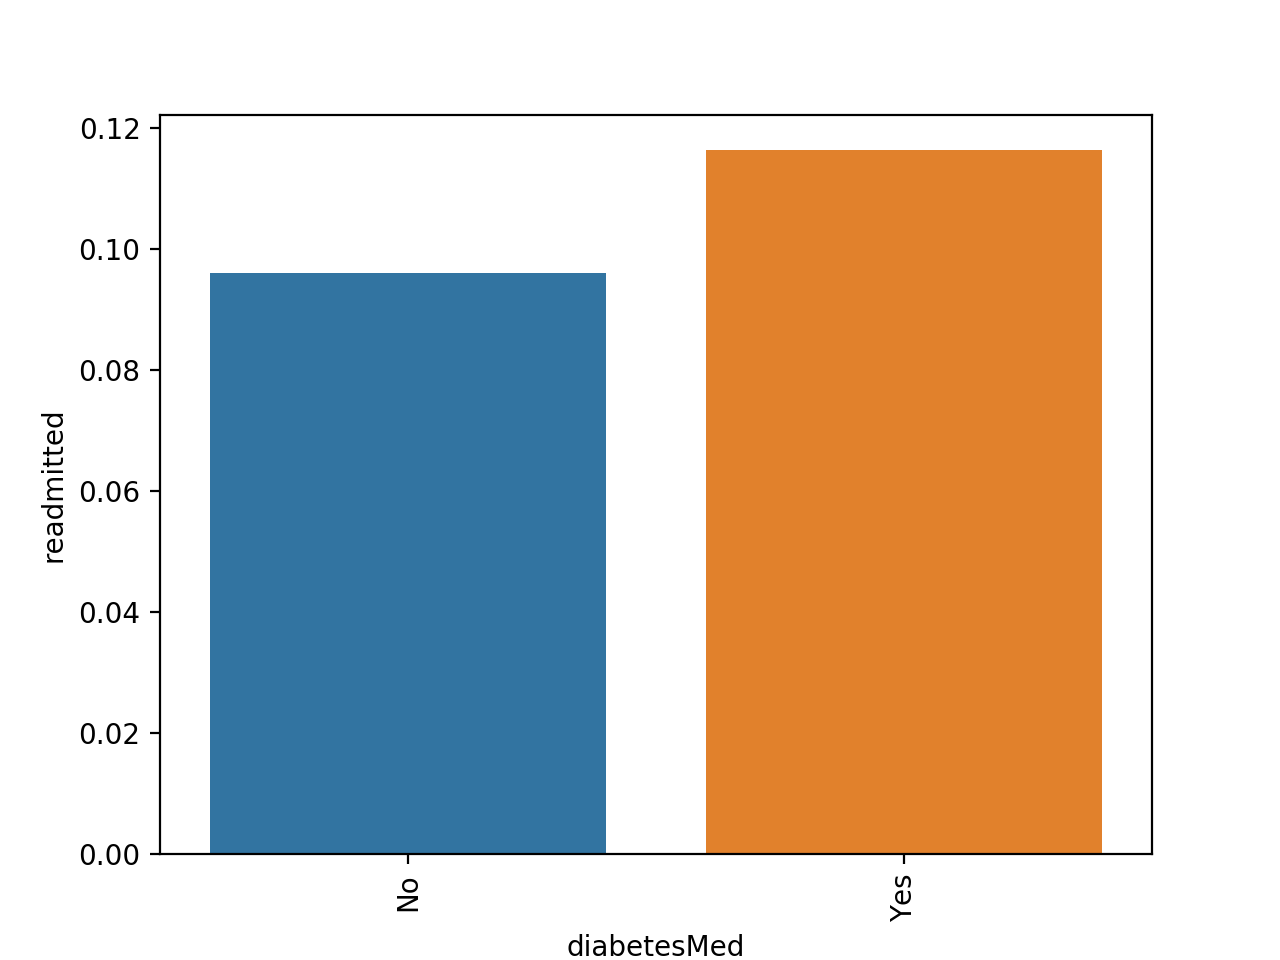

In [41]:
ax = sns.barplot(x='diabetesMed', y = 'readmitted', data = df, estimator = np.mean, ci = None)
ax.tick_params(axis ='x', rotation = 90);
# interesting here, again due to heavily imbalance in data distribution,
# people with diabetes still have higher readmission rate compare to its counterpart.

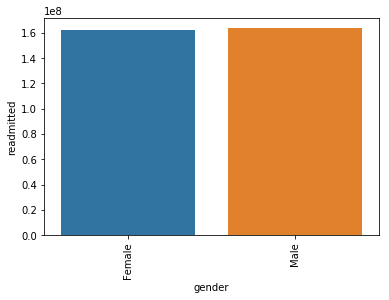

In [71]:
ax = sns.barplot(x='gender', y = 'readmitted', data = df, estimator = np.mean, ci = None)
ax.tick_params(axis ='x', rotation = 90);

In [33]:
df.groupby('race').agg({'time_in_hospital': ['mean','max','min']}).head()

time_in_hospital        
                            mean max min
race                                    
AfricanAmerican         4.507860  14   1
Asian                   3.995320  14   1
Caucasian               4.382930  14   1
Hispanic                4.059892  14   1
Other                   4.273572  14   1

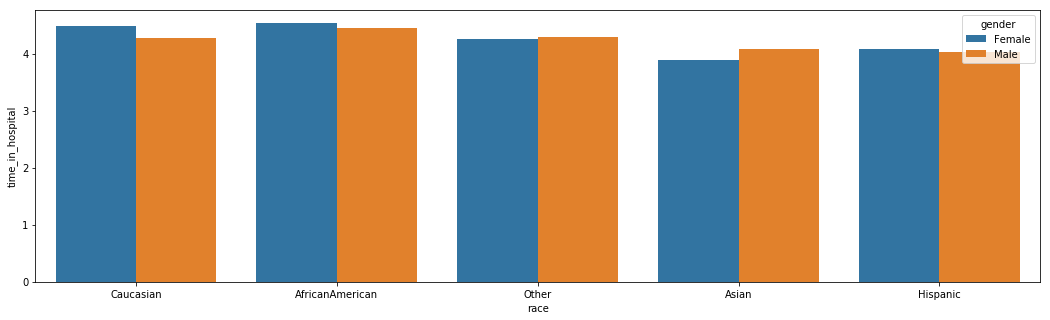

In [58]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x='race', y='time_in_hospital', data=df, hue='gender',
estimator=np.mean, ci=None, ax=ax);